# Netflix Data Analysis
____

1. **Importing Libraries**
2. **Loading the dataset**
3. **Data Cleaning:**
    * Deleting redundant columns.
    * Dropping duplicates.
    * Cleaning individual columns.
    * Remove the NaN values from the dataset
    * Some Transformations
4. **Data Visualization:** Using plots to find relations between the features.
    * Type: Movie and TV Shows
    * Rating
    * Relation between Type and Rating
5. **Word Cloud**
    * Country
    * Cast
    * Director
    * Category

____

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Sagar Charma\AppData\Local\Temp\ipykernel_13740\1654069430.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Loading Dataset**

In [2]:
netflix_df = pd.read_csv('netflix_titles.csv')

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
netflix_df.shape

(6234, 12)

In [5]:
# column titles
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Checkin if dataset contains null value

In [6]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

Checking unique values

In [7]:
netflix_df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

Checking for duplicates

In [8]:
netflix_df.duplicated().sum()

0

____
Copying the data set

In [9]:
df = netflix_df.copy()

In [10]:
df.shape

(6234, 12)

Dropping the null values

In [11]:
df = df.dropna()
df.shape

(3774, 12)

In [12]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


**Converting Date Time Format**

In [22]:
df["date_added"] = pd.to_datetime(df['date_added'], errors='coerce')
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# df['year_added'].astype(int)
# df['day_added'].astype(int)

In [23]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9.0,2019.0,9.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,8.0,2017.0,9.0
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",8.0,2017.0,9.0
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,8.0,2017.0,9.0
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,8.0,2017.0,9.0


## Data Visualization

C:\Users\Sagar Charma\AppData\Local\Temp\ipykernel_13740\879449678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=netflix_df['type'], palette='tab10')


Text(0.5, 1.0, 'Type')

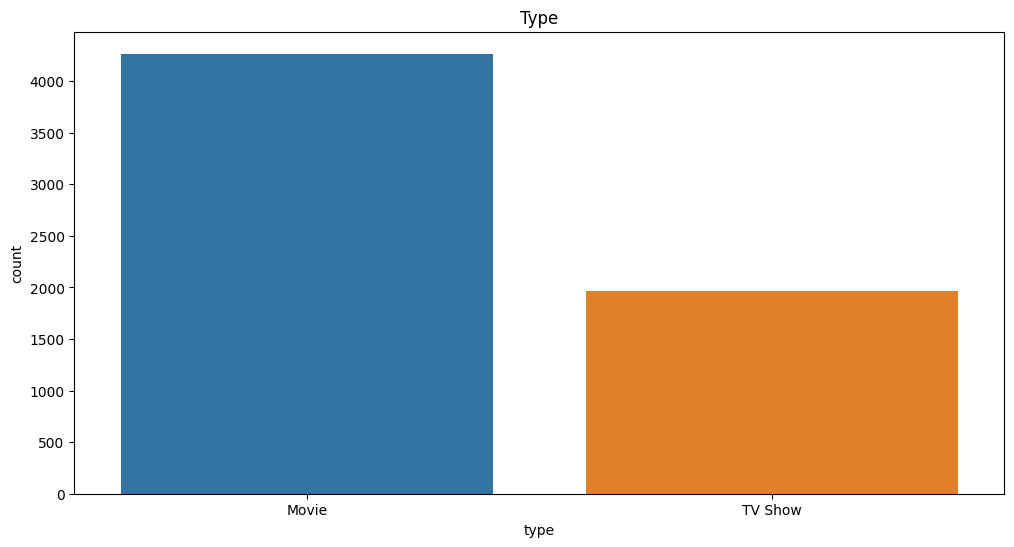

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x=netflix_df['type'], palette='tab10')
plt.title('Type')


Rating of each shows and movies

C:\Users\Sagar Charma\AppData\Local\Temp\ipykernel_13740\465683357.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=netflix_df['rating'], palette='tab10')


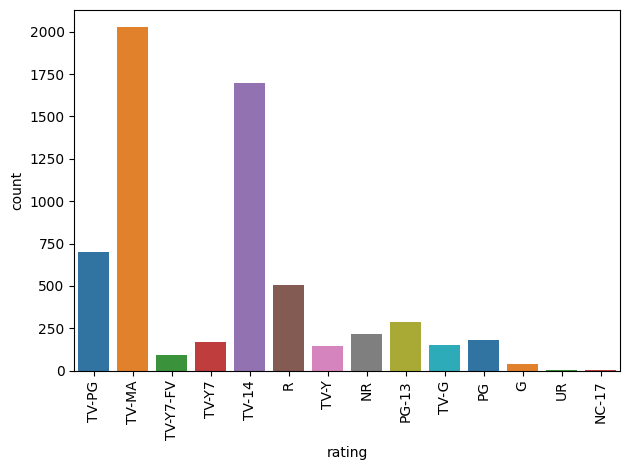

In [32]:
sns.countplot(x=netflix_df['rating'], palette='tab10')
plt.xticks(rotation=90)
plt.tight_layout()

Relation between type and rating

Text(0.5, 1.0, 'Relation between type and rating')

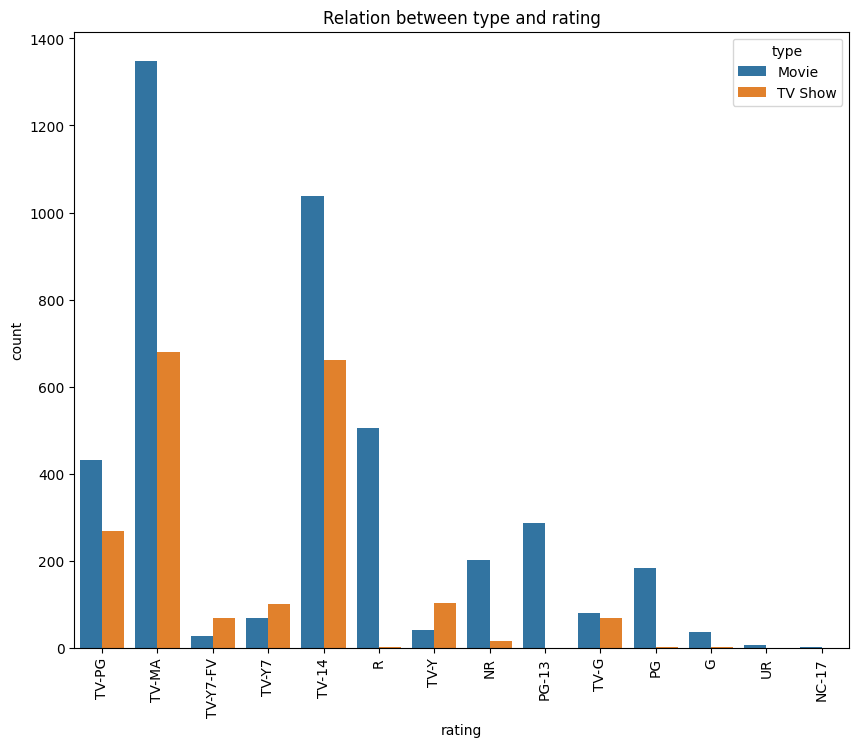

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating', hue='type', data=netflix_df, palette='tab10')
plt.xticks(rotation=90)
plt.title('Relation between type and rating')

Pie chart for the Type: Movies or TV Show

Text(0.5, 1.0, 'Distribution of Type')

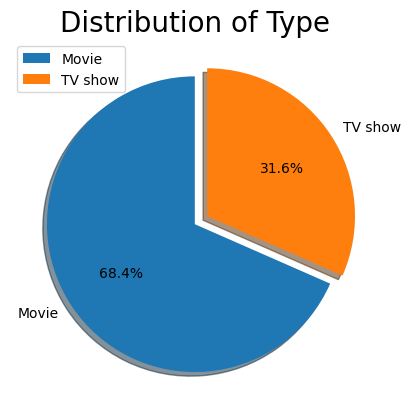

In [43]:
labels = ['Movie','TV show']
size = netflix_df['type'].value_counts()
explode = [0,0.1]
plt.pie(size, labels=labels,autopct='%1.1f%%', explode = explode, shadow = True,startangle = 90)
plt.legend()
plt.title('Distribution of Type', fontsize = 20)


Pie Chart for Rating

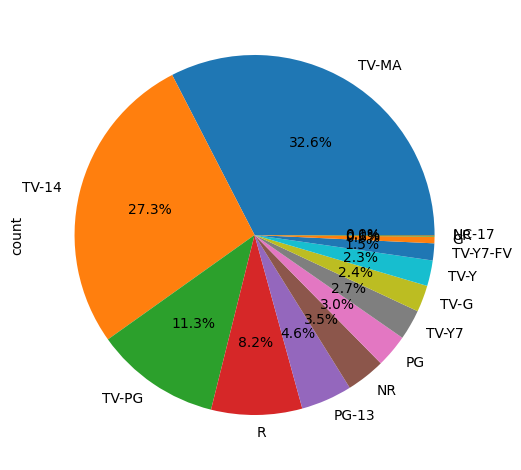

In [49]:
netflix_df['rating'].value_counts().plot.pie(autopct='%1.1f%%', shadow=False)
plt.tight_layout()

## Word Cloud 

In [50]:
from wordcloud import WordCloud

### Country

In [52]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


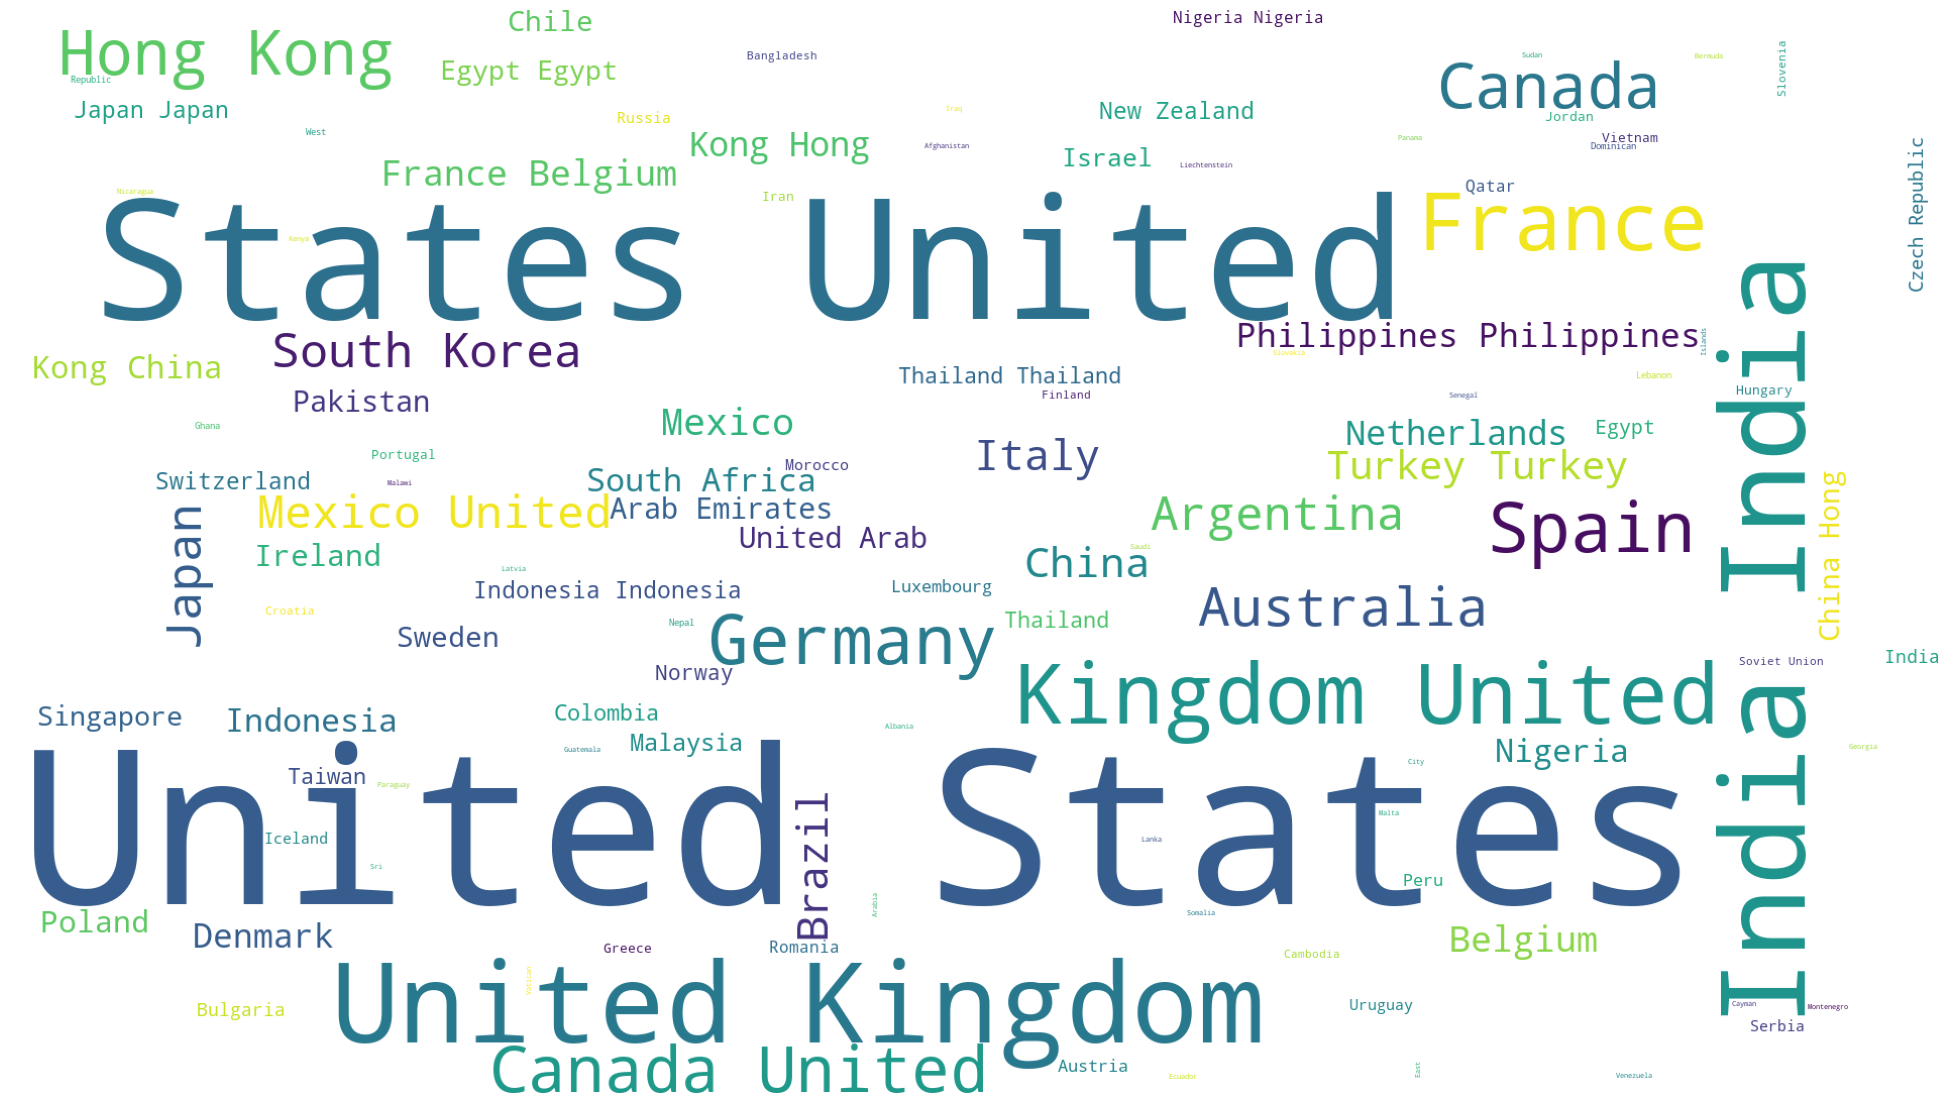

In [56]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
    background_color='white',
    width=1920,
    height=1080,
).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()


### Casts

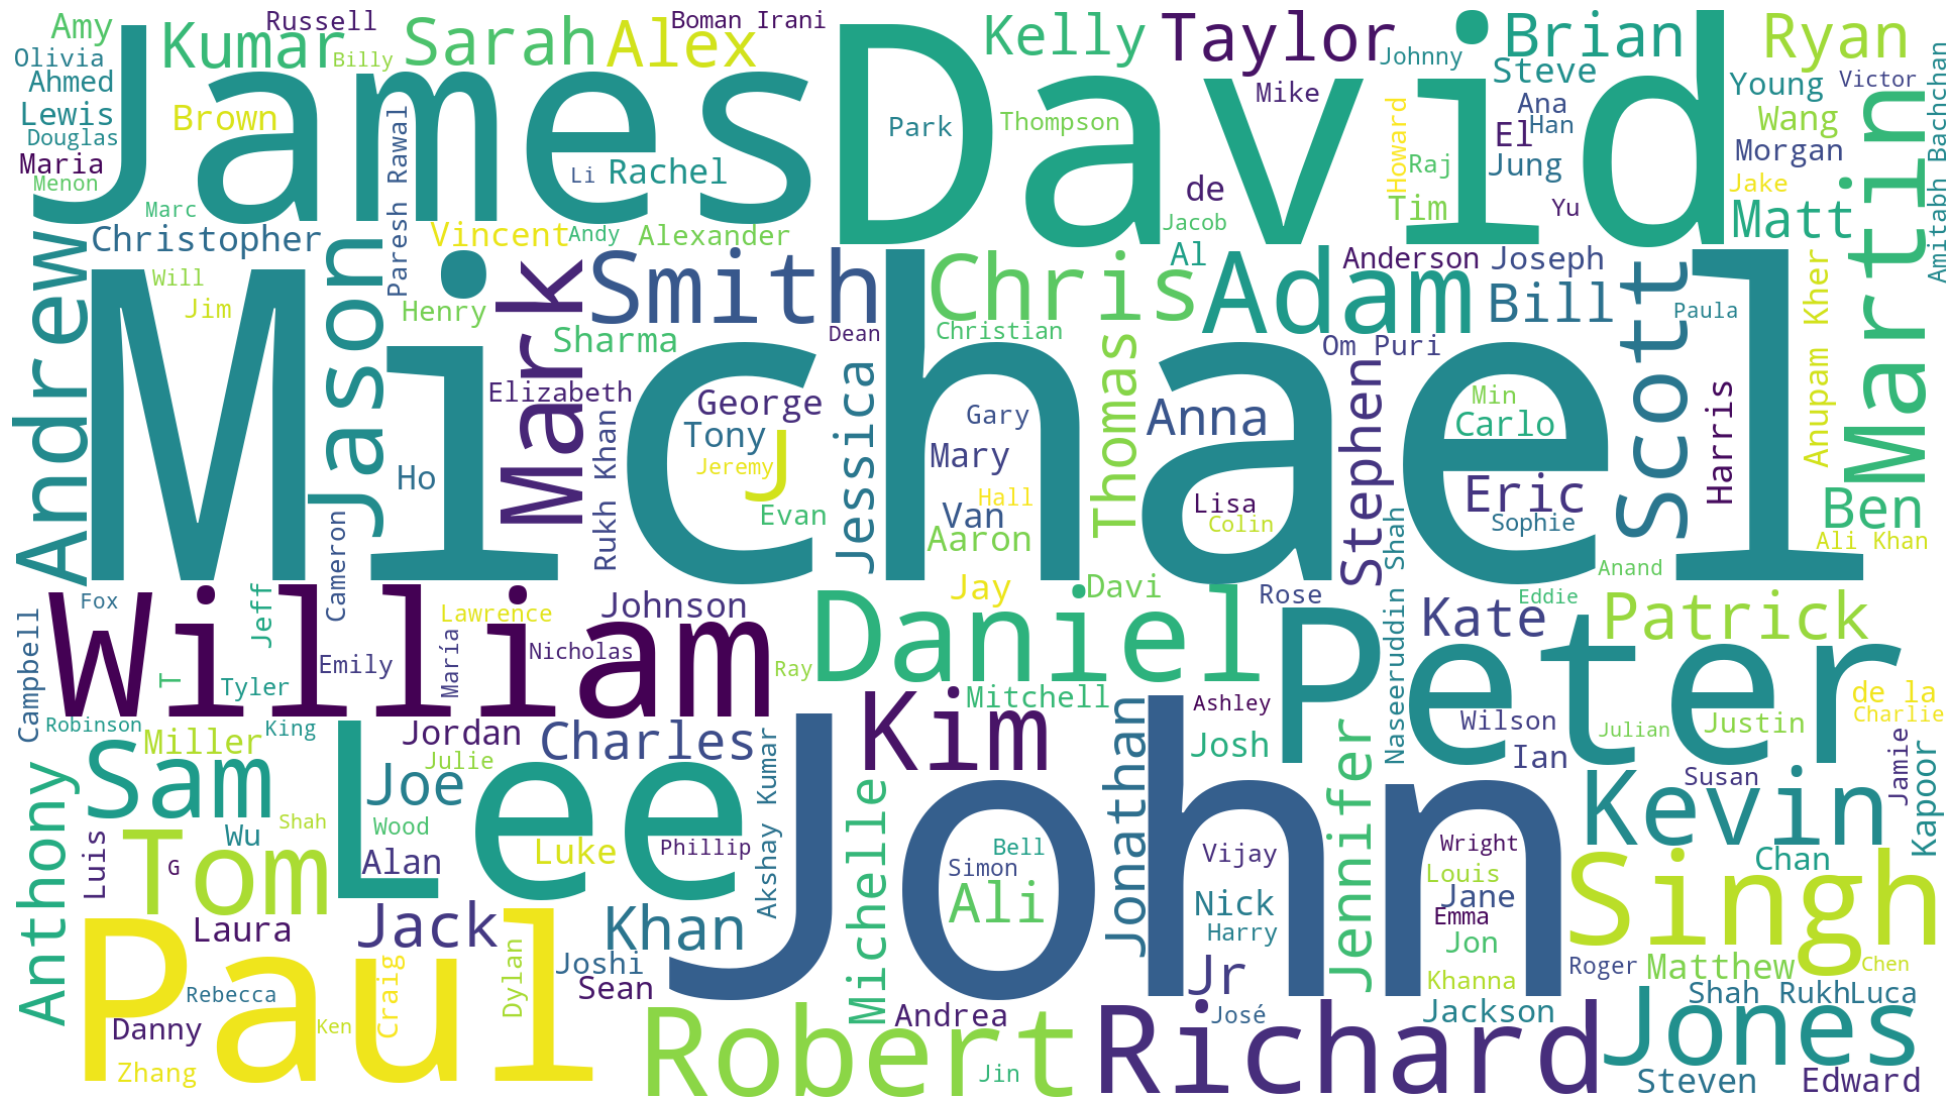

In [60]:
plt.subplots(figsize=(25,15))

cast_names = " ".join(df['cast'].astype(str))
wordcloud = WordCloud(
    background_color='white',
    width=1920,
    height=1080,
).generate(cast_names)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Directors

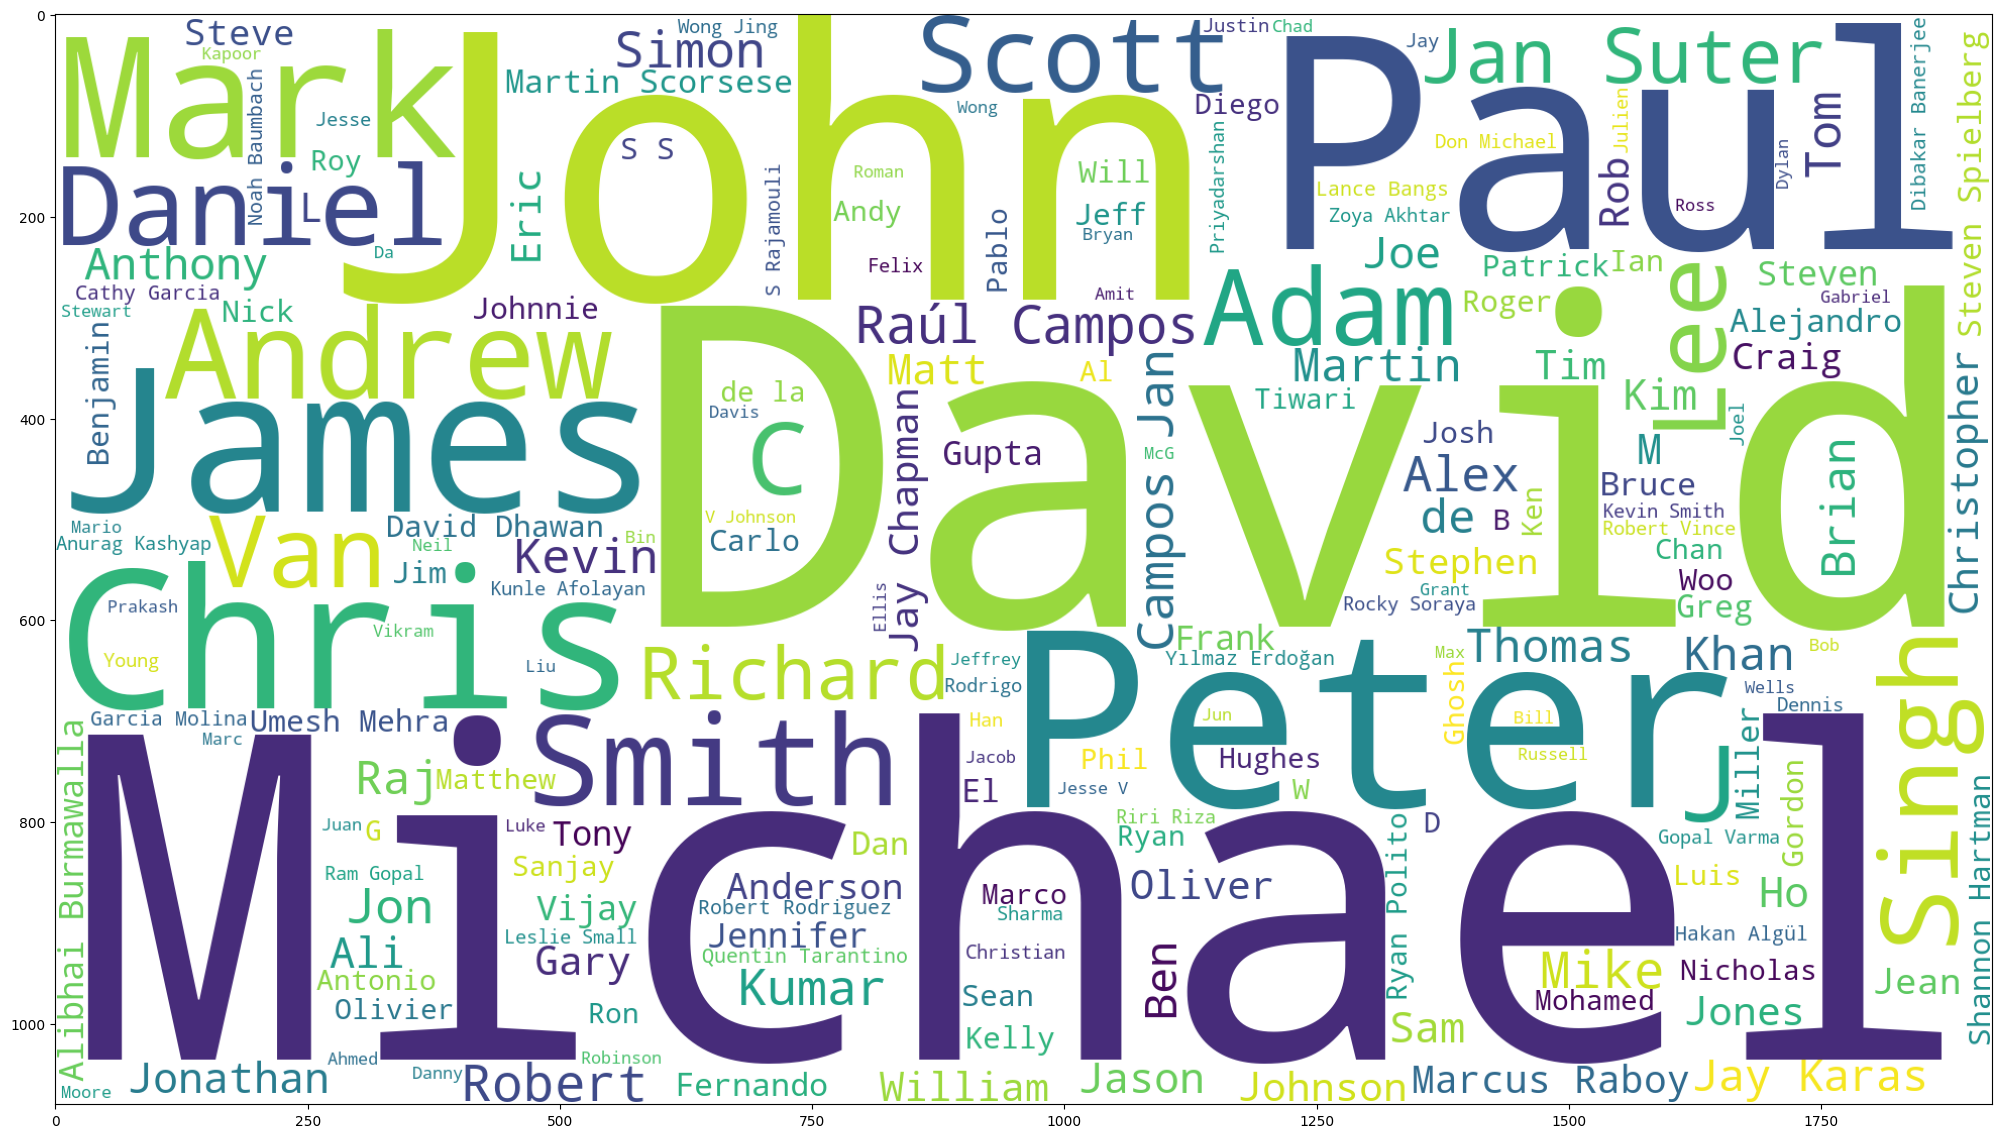

In [65]:
plt.figure(figsize=(25,15))

director_names = ' '.join(df['director'])

wordcloud = WordCloud(
    background_color='white',
    width=1920,
    height=1080
).generate(director_names)
plt.imshow(wordcloud)
plt.savefig('director.png')
plt.show()

### Categories

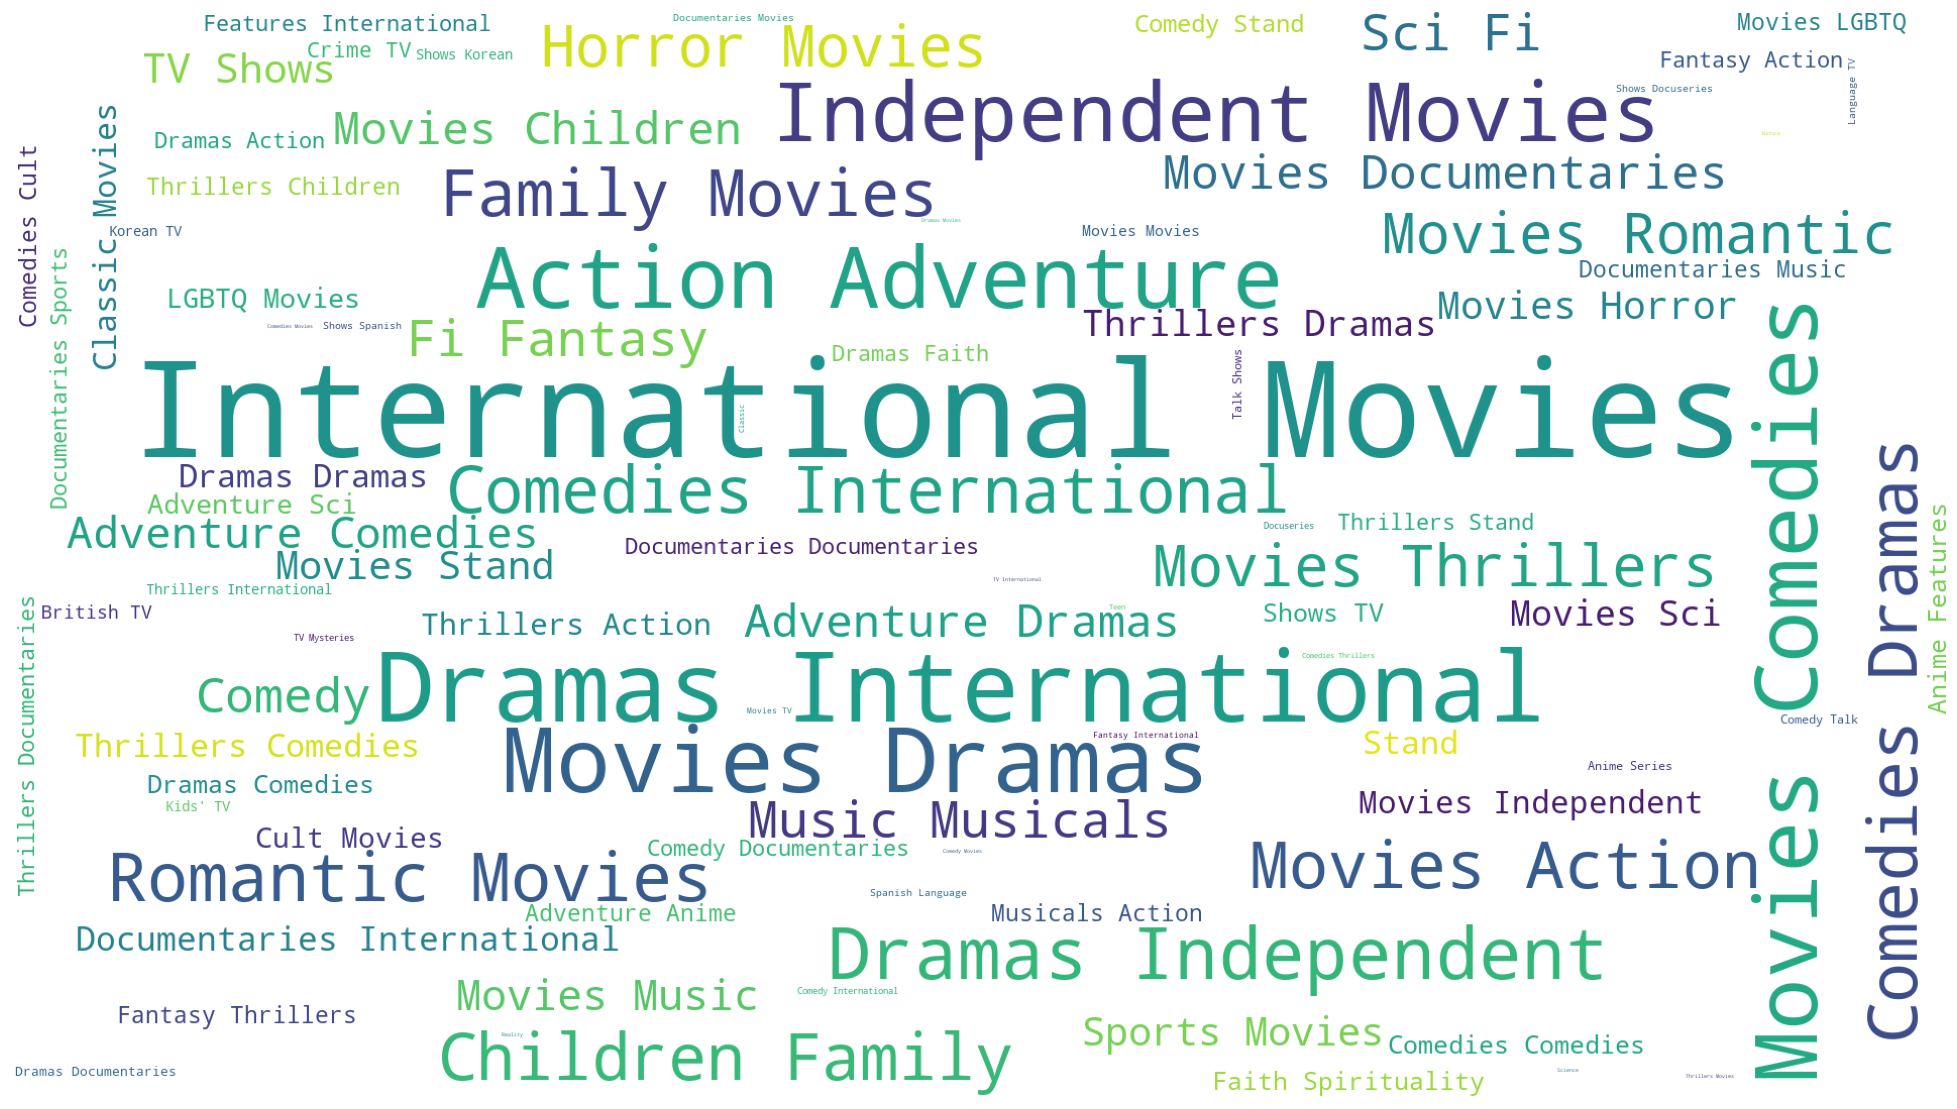

In [67]:
plt.subplots(figsize=(25,15))

category = ' '.join(df['listed_in'])

wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(category)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

____